<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/5/5-1/%ED%8A%B8%EB%A6%AC_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이번장 키워드

 - 결정트리
 - 불순도
 - 정보 이득
 - 가지치기 
 - 특성 중요도

# Q. 다양한 특성을 통해 클래스를 분류할 수 있을까

In [30]:
# 로지스틱 회귀로 클래스 분류하기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
# 0 이면 레드와인, 1이면 화이트 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [31]:
import plotly as plt
wine['class'].unique()

array([0., 1.])

In [32]:
# 데이터 분석
wine.info()
# 총 6497개의 데이터가 있고, float 형 dtype / 널값은 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [33]:
# 데이터 열에 대한 통계를 보는 describe()
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [34]:
# 학습 / 타겟 데이터 나눈 후 train_test split
from sklearn.model_selection import train_test_split

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

train_input,test_input, train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [35]:
print(train_input.shape,test_input.shape) # 각각 3개의 특성 존재

(5197, 3) (1300, 3)


In [36]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [37]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀로 점수 보기
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [38]:
# 특성별 계수와 절편 알아보기
print(lr.coef_,lr.intercept_) #도수, 설탕, pH에 대한 계수값과, 마지막 절편 더하기

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


### 그런데 웃긴건 
우리는 이 모델이 왜 이런 계수를 학습했는지 이해할 수 없음 대부분의 머신러닝 모델의 학습 결과도 정확히 설명할 수 없음 <br><br>

따라서 좀 더 쉬운방법으로 모델을 설명하기 위해 ***결정트리*** 모델을 사용하여 학습 진행

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))
# 훈련 세트에 대한 점수가 높은거로 보아 과대적합된 결과로 볼 수 있음

0.996921300750433
0.8553846153846154


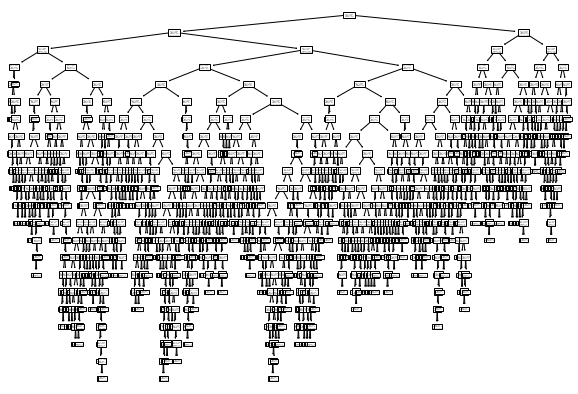

In [40]:
# 학습한 결과를 그림으로 표현하기
import matplotlib.pyplot as plt
# plot_tree() 함수를 활용해 결정트리를 이해하기 쉬운 트리 그림으로 출력해줌
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) # figrize(가로크기, 세로크기)
plot_tree(dt)              # 사용한 트리모델을 그림
plt.show()

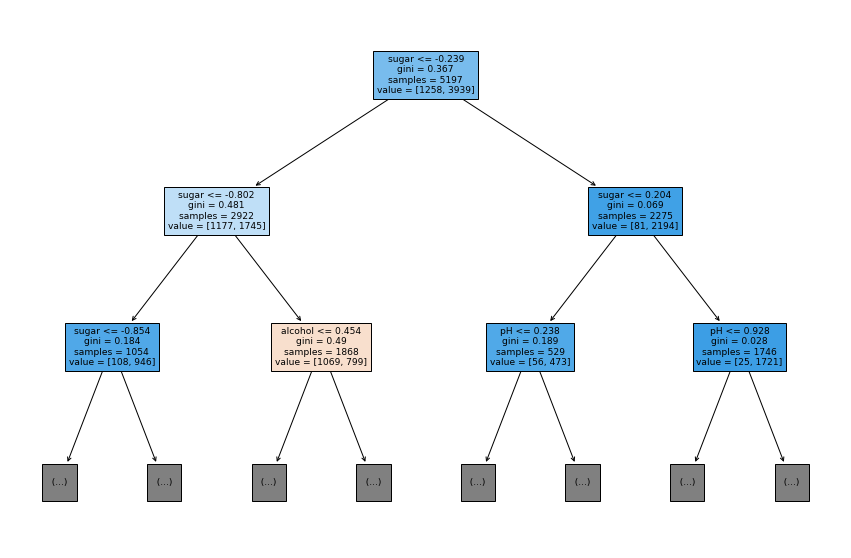

In [41]:
plt.figure(figsize=(15,10))
plot_tree(dt,max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])
# max_depth -> 루트를 제외하고 n개의 깊이를 표현
# feature_names 매개변수에 특성 이름을 전달 할 수 있음

plt.show()

# 트리 읽기
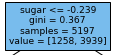<br>
 - sugar = 테스트 조건
 - gini = 불순도
 - samples = 총 샘플수
 - value = 클래스별 샘플 수
 - 왼쪽 경로 = 조건 만족
 - 오른쪽 경로 = 조건 불만족
 - 트리 해석
  > 1. 당도가 -0.239 보다 작거나 같을 땐 -> yes(왼쪽 양성 클래스로 감)
  2. 당도가 더 클땐 -> no(오른쪽 음성 클래스로 감)
  3. 음성 클래스의 개수는 1258개이고, 양성의 개수는 3939개임
 - 결정트리가 예측하는 방법은 리프노드에서 가장 많은 클래스가 예측 클래스가 됨 

# 불순도
 - gini = 지니 불순도를 의미함
 - 결정트리에 사용되는 클래스 개수에 따른 케이스들의 불순한 정도를 나타내는 척도, 따라서 클래스별 비율을 가지고 계산을 한다.
 - DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 gini 임
  > 이 매개변수는 노드에서 데이터를 분할할 기준을 정함<br>
 - 위의 "트리읽기" 부분에서 -0.239라는 기준은 지니불순도를 활용해 왼쪽과 오른쪽 노드를 나눔
 - 지니불순도 = 1-(음성클래스 비율^2 + 양성클래스 비율^2)
  > "트리읽기" 데이터 예시<br>
  해당 노드의 지니불순도(0.367) = 1- ((1258/5197)^2+(3939/5197)^2)
 - 불순도는 엔트로피와 관련이 있음
  > 순도가 100% (노드 내에 하나의 클래스만 있는 경우) 일 경우 불순도는 0이 되고, 엔트로피는 0 이다.
  > 순도가 50% (반반 섞여있는 경우) 엔트로피가 최대값을 가지며, 분류하기 가장 어려운 상태 이다.
  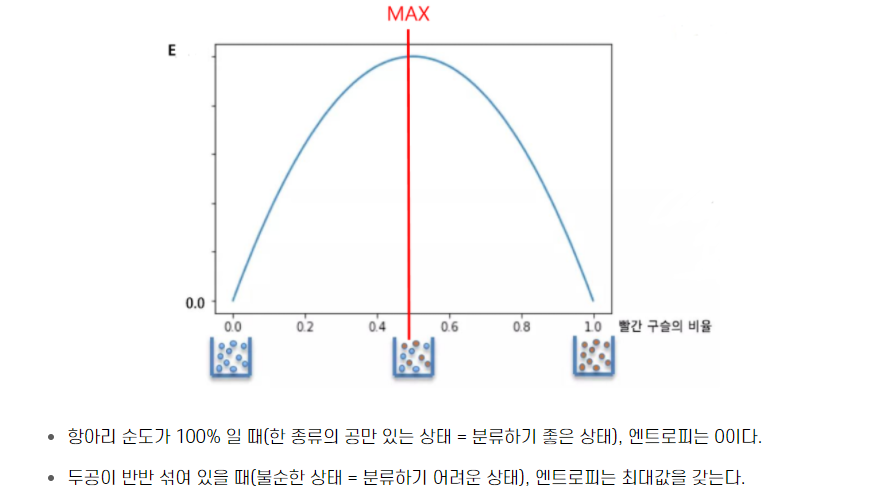

# 정보 이득
 - 어떠한 속성을 선택함으로 인해 데이터를 더 잘 구분할 수 있는지를 말하며, 상위 노드의 엔트로피에서(부모노드 불순도) 하위노드 엔트로피의(자식노드의 불순도) 값을 뺀다.
 - 결정트리는 정보이득이  최대가 되도록 데이터를 나눈다.
 - 이때 지니불순도를 기준으로 데이터를 나눈다.
 - 지니 불순도 만이 아닌, 엔트로피 불순도를 사용하여 분류를 하기도 한다.
  >`criterion='entropy'` 를 매개변수로 사용한다. 

# 가지치기
 - 결정트리의 모든 terminal node의 순도가 100% 인 경우를 Full Tree라 한다.
 - 이경우 너무많은 분기가 생겨 과적합의 위험이 발생한다. (훈련세트에 학습은 잘 되었지만, 테스트 세트에 대해서는 엉망) -> 일반화가 잘 안 되었다.
 - 결정트리에서 가장 간단한 가지치기 방법은 트리의 최대 깊이를 지정하는것 이다.

In [44]:
# 트리의 최대 깊이를 3으로 제한
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))  # 훈련세트에 대한 성능은 낮아졌지만
print(dt.score(test_scaled,test_target))    # 테스트세트는 그대로이며, 두 세트의 차이가 적어짐

0.8454877814123533
0.8415384615384616


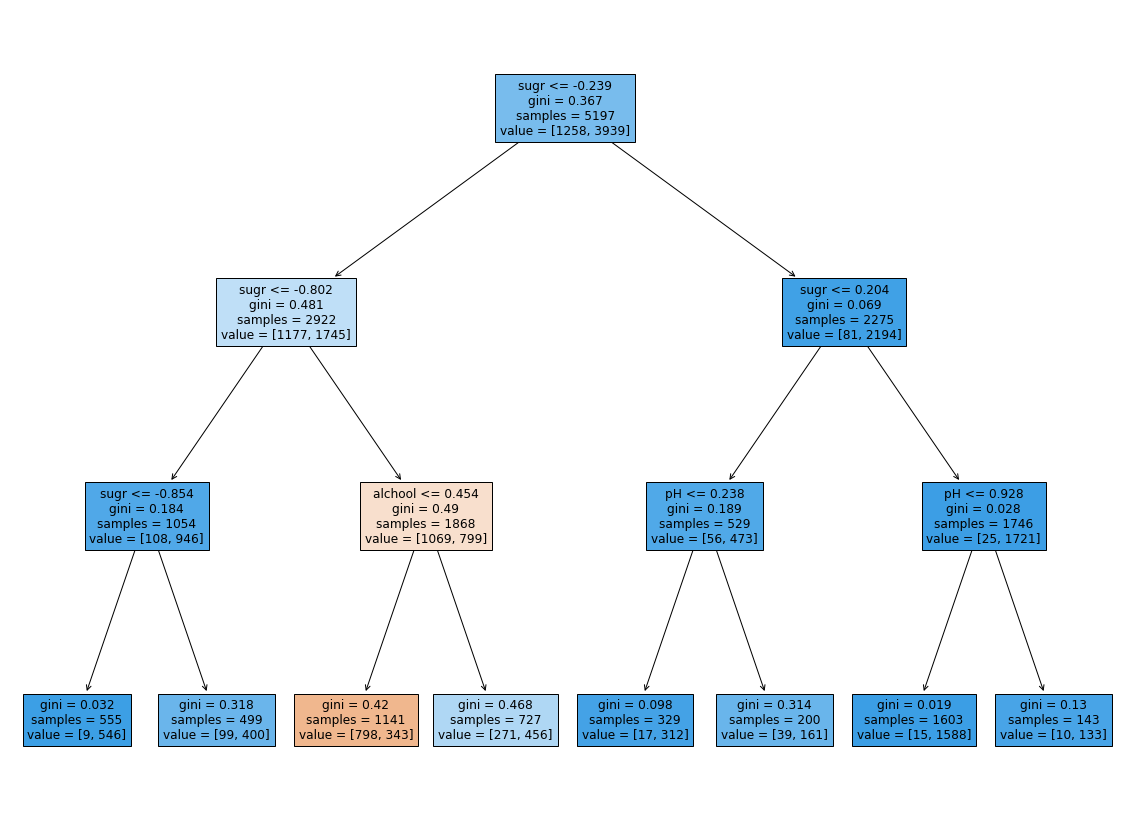

In [47]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alchool','sugr','pH'])
plt.show()

# 결과 해석
 - 트리의 깊이는 3으로 제한
 - 깊이 3을 보면, 왼쪽에서 3번째 데이터만 음성 클래스(레드와인)
 - 그런데, 결과를 보면 당도가 -0.802와 같이 음수로 표현되어 있다.
  > 이는 현실세계에서 데이터를 해석 할때, 많은 어려움이 있다.
 - 결정트리의 경우 스케일의 정규화가 아닌, 클래스별 비율로 데이터를 나누기 때문에, 표준 정규화의 과정이 따로 필요없다.

In [49]:
# 위의 결과를 증명하기 위해, 표준화(StandardScaler)를 진행하기 전 데이터로 학습 및 결과를 확인해 보자

dt=DecisionTreeClassifier(max_depth=3,random_state=42)
# 정규화 하기 전 데이터로 학습
dt.fit(train_input,train_target)
# 정규화 하기전 데이터로 성능 평가
print(dt.score(train_input,train_target))  
print(dt.score(test_input,test_target)) 
# 앞서 정규화 한 데이터와 똑같은 결과를 내보임

0.8454877814123533
0.8415384615384616


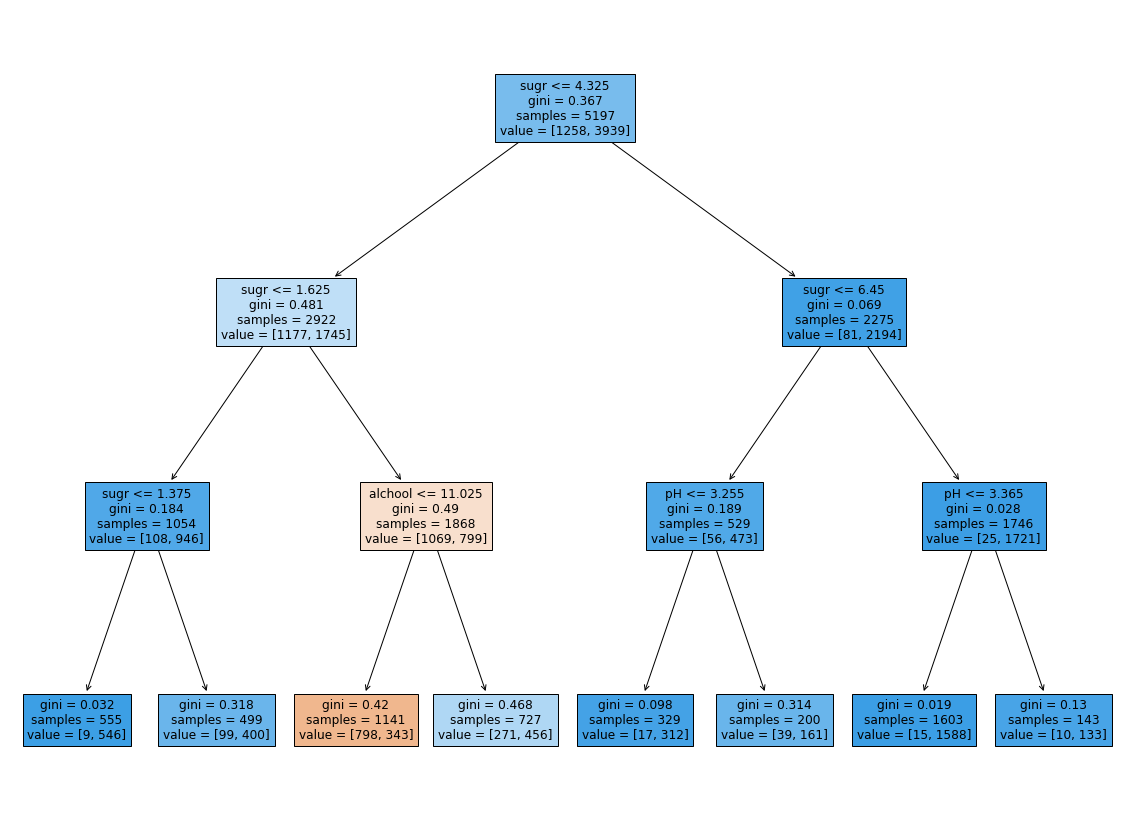

In [50]:
# 위의 결과를 그림으로 나타내 보자
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alchool','sugr','pH'])
plt.show() 
# 앞서 그린 트리와 다르게 보기 쉽게 데이터가 출력됨

In [62]:
# 결정트리를 형성하는데 중요한 요소들을 계산해보기
# 이 예제에서는 총 3가지의 요소(alchool, sugr, pH)가 있다,
# feature_importances_ 를 통해 요소별 중요도를 비율로 볼 수 있다.
print(dt.feature_importances_) # 여기에서는 당도가 중요한 요소임을 알 수 있음
wine.columns

[0.12345626 0.86862934 0.0079144 ]


Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

# 이번장 마무리
 - 결정트리 : 